# Food Items

## About Dataset

### Context:
This dataset provides detailed nutritional information for a variety of food items. It is ideal for analyzing dietary content, classifying food healthiness, and building machine learning models for nutritional recommendations. It includes nutrient values like fats, carbohydrates, proteins, and vitamins, and categorizes food items into labels such as "In Moderation" and "Less Often".

### Content:
| Column               | Description |
|----------------------|-------------|
| Calories             | Energy content of the food item (0–2210 kcal) |
| Total Fat            | Total fat in grams, including all fat types (0–43 g) |
| Saturated Fat        | Saturated fats (0–22 g), often considered less healthy |
| Monounsaturated Fat  | Monounsaturated fats (0–22 g), typically considered healthy fats |
| Polyunsaturated Fat  | Polyunsaturated fats (0–20 g), essential fatty acids |
| Trans Fat            | Trans fats (0–11 g), generally considered unhealthy |
| Cholesterol          | Cholesterol content in mg (0–450 mg) |
| Sodium               | Sodium content in mg (0–2431 mg), related to salt |
| Total Carbohydrate   | Carbohydrate content in grams (0–270 g) |
| Dietary Fiber        | Dietary fiber in grams (0–305 g) |
| Sugars               | Total sugar content in grams (0–115 g) |
| Sugar Alcohol        | Sugar alcohols (0–31 g), low-calorie sweeteners |
| Protein              | Protein content in grams (0–70 g) |
| Vitamin A            | Vitamin A amount (0–622 IU or mg, depending on unit) |
| Vitamin C            | Vitamin C amount (0–1000 mg) |
| Calcium              | Calcium content (0–110 mg) |
| Iron                 | Iron content (0–170 mg) |
| class                | Nutritional recommendation label (e.g., "In Moderation", "Less Often", or other) |

### Problem Statement (Goal):
The goal of this project is to analyze the nutritional composition of various food items and classify them into health-related categories such as **"In Moderation"**, **"Less Often"**, or others.

### Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
df = pd.read_csv('food_items.csv')
df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


In [3]:
df.shape

(13260, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             13260 non-null  float64
 1   Total Fat            13260 non-null  int64  
 2   Saturated Fat        13260 non-null  float64
 3   Monounsaturated Fat  13260 non-null  float64
 4   Polyunsaturated Fat  13260 non-null  float64
 5   Trans Fat            13260 non-null  float64
 6   Cholesterol          13260 non-null  int64  
 7   Sodium               13260 non-null  float64
 8   Total Carbohydrate   13260 non-null  float64
 9   Dietary Fiber        13260 non-null  float64
 10  Sugars               13260 non-null  float64
 11  Sugar Alcohol        13260 non-null  int64  
 12  Protein              13260 non-null  float64
 13  Vitamin A            13260 non-null  int64  
 14  Vitamin C            13260 non-null  int64  
 15  Calcium              13260 non-null 

In [5]:
df.describe().round(2)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00,13260.00
mean,133.86,4.48,1.45,0.34,0.25,0.05,8.86,241.87,18.23,1.60,6.65,0.12,4.66,6.29,6.74,5.18,5.24
std,94.23,5.39,2.41,1.35,2.23,0.32,20.98,272.28,14.79,3.36,8.33,1.12,5.61,18.37,23.79,8.78,9.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,70.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,120.00,3.00,0.50,0.00,0.00,0.00,0.00,135.00,17.00,1.00,3.00,0.00,3.00,0.00,0.00,2.00,2.00
75%,180.00,7.00,2.00,0.00,0.00,0.00,10.00,370.00,27.00,2.00,11.00,0.00,7.00,6.00,2.00,6.00,8.00
max,2210.00,43.00,22.00,40.00,235.00,11.00,450.00,2431.00,270.00,305.00,115.00,31.00,70.00,622.00,1000.00,110.00,170.00


In [6]:
df.describe(include='object')

,class
count,13260
unique,3
top,'In Moderation'
freq,6649


## Data Preprocessing

### 1. Check **Duplicates**

In [7]:
df.duplicated().sum()

2341

#### Remove **Duplicates**

In [8]:
df.drop_duplicates(inplace=True)

### 2. Check **Missing values**

In [9]:
df.isna().sum()

Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
class                  0
dtype: int64

#### There are **no** missing values

### 3. Check **Outliers**

In [10]:
numeric_colmns = df.select_dtypes(include='number').columns
numeric_colmns, len(numeric_colmns)

(Index(['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat',
        'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium',
        'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol',
        'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron'],
       dtype='object'),
 17)

In [11]:
categoric_colmns = df.select_dtypes(include='object').columns
categoric_colmns

Index(['class'], dtype='object')

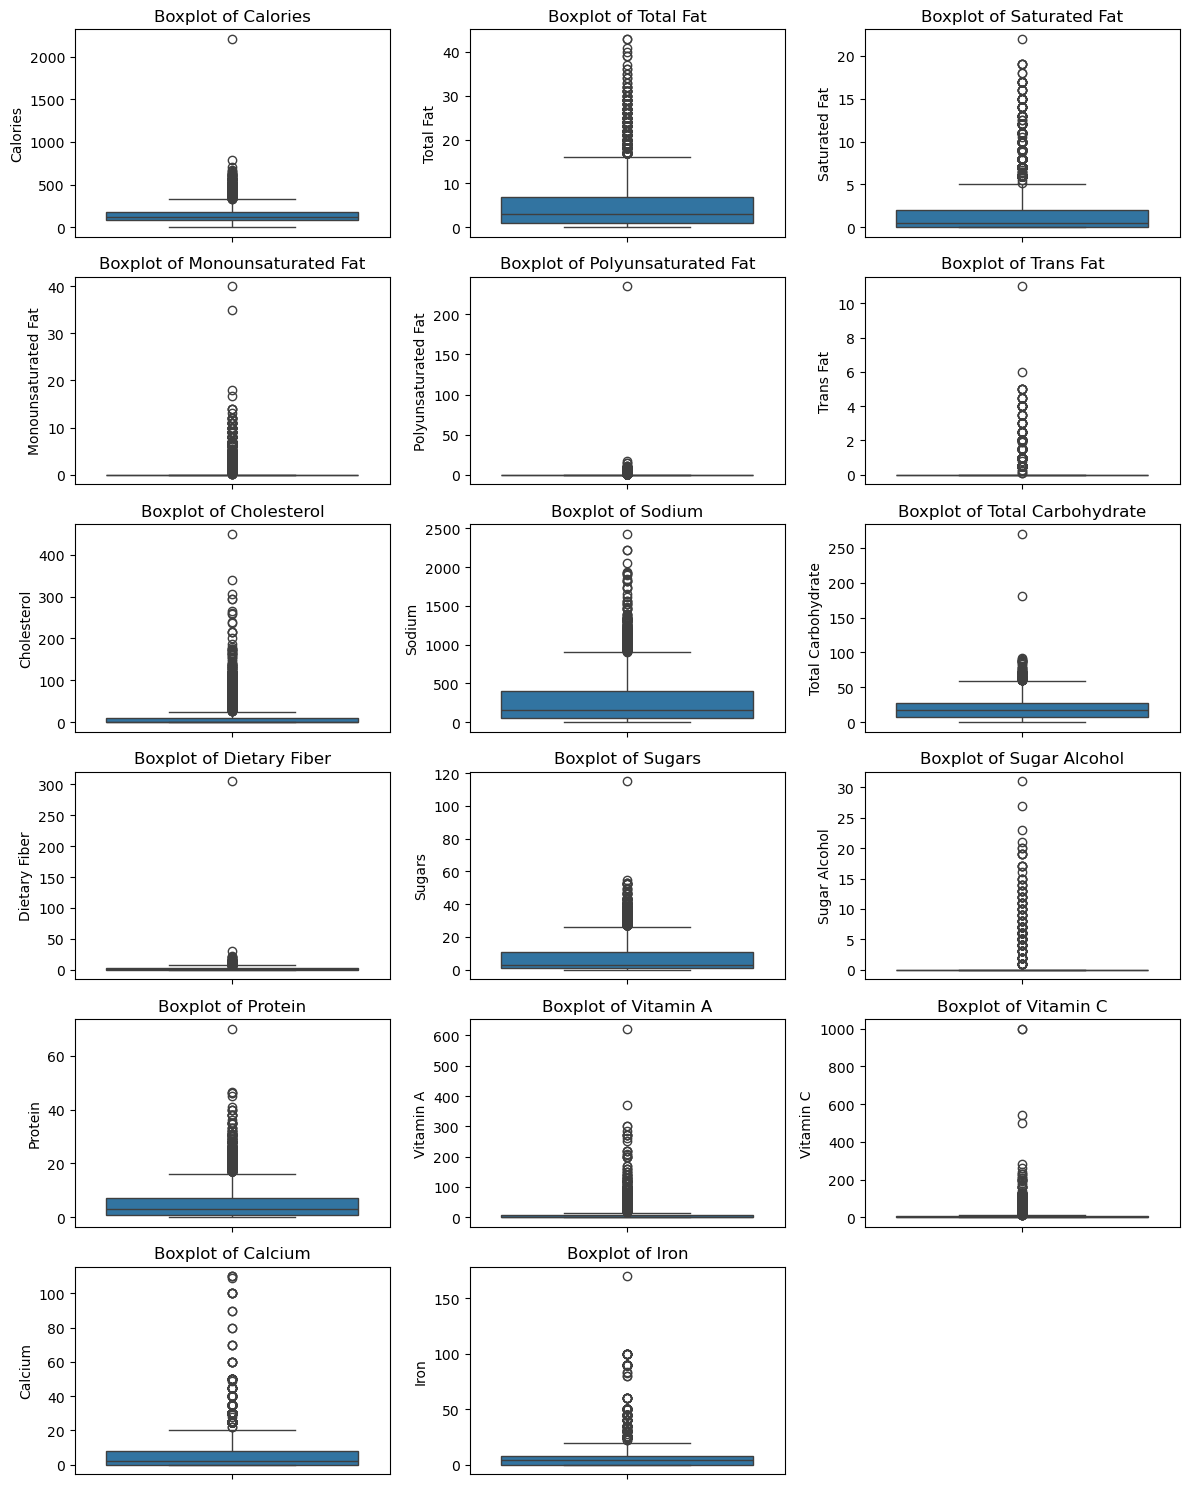

In [12]:
plt.figure(figsize=(12, 15))

for i, col in enumerate(numeric_colmns):
    plt.subplot(6, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

#### Since one of Assumbtions of Logistic Regression is **Sensitive to Outliers** so will **Remove it**

In [13]:
data = df.copy()

for col in numeric_colmns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper = Q3 + 2 * IQR
    
    data = data[data[col] <= upper]
    # data[col] = data[col].clip(upper=upper)

In [14]:
# plt.figure(figsize=(12, 15))

# for i, col in enumerate(numeric_colmns):
#     plt.subplot(6, 3, i+1)
#     sns.boxplot(data=data, y=col)
#     plt.title(f'Boxplot of {col}')
    
# plt.tight_layout()
# plt.show()

### 4. Remove **unuseful** columns

In [15]:
data.drop(columns=['Monounsaturated Fat','Polyunsaturated Fat','Trans Fat','Sugar Alcohol'], inplace=True)

#### Their Variance is almost **zero** not make any dicision

## Feature Engeeniring

### Target Encoding

In [16]:
data['class'].value_counts()

class
'In Moderation'    2239
'Less Often'       1560
'More Often'        453
Name: count, dtype: int64

In [17]:
data_E = data.copy()
data_E['class'] = pd.Categorical(data_E['class'],
                categories=["'Less Often'", "'In Moderation'", "'More Often'"],
                ordered=True).codes

data_E['class'].value_counts()

class
1    2239
0    1560
2     453
Name: count, dtype: int64

### Feature Selection

In [18]:
data_E.columns

Index(['Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium',
       'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'class'],
      dtype='object')

<Axes: >

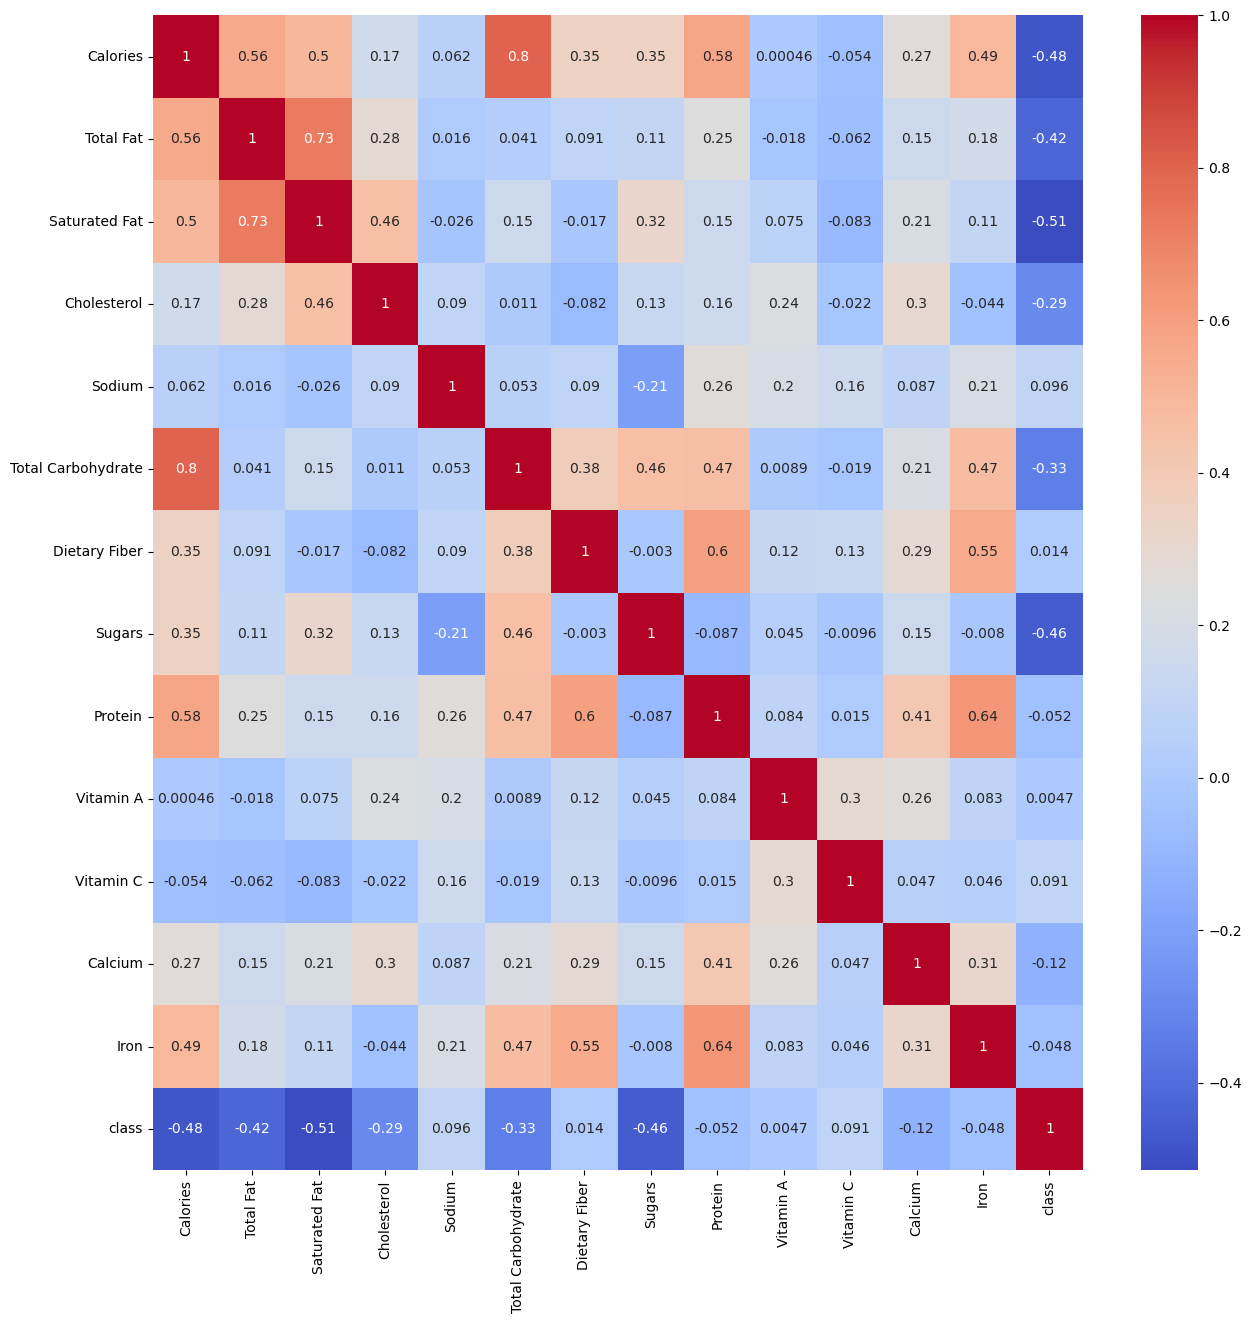

In [19]:
### 5. Check **Correlation**
plt.figure(figsize=(15, 15))
corr = data_E.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### Since one of important Assumptions of Logistic Regression is **No Multicollinearity**, so `Calories` & `Total Carbohydrate` columns have **high** correlation between them so will **Remove** `Total Carbohydrate` because it have **lower** correlation between **Target**
#### and same thing with `Total Fat` & `Saturated Fat` will **Remove** `Total Fat`

### **After removed them and test model i show that the model performence decreased**

In [20]:
data_M = data_E.copy()
# data_M = data_E.drop(columns=['Calcium'])
data_M.head()

,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0,9.0,9.8,0.0,0.0,1.3,0,0,0,0,1
1,123.0,0,0.0,0,5.0,6.6,0.0,0.0,0.8,0,0,0,0,1
2,150.0,0,0.0,0,4.0,11.4,0.0,0.0,1.3,0,0,0,0,1
3,110.0,0,0.0,0,6.0,7.0,0.0,0.0,0.8,0,0,0,0,1
4,143.0,0,0.0,0,7.0,13.1,0.0,0.0,1.0,0,0,0,0,1


In [21]:
# plt.figure(figsize=(12, 8))
# corr = data_M.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')

### Transformation

In [22]:
# plt.figure(figsize=(15, 10))

# for i, col in enumerate(data_M.drop(columns='class').columns):
#     plt.subplot(3, 4, i + 1)
#     plt.hist(data_M[col])
#     plt.title(f'Histogram of {col}')

# plt.tight_layout()
# plt.show()

#### Since all festures are **Right-Skewed** so can apply **log transformation**

In [23]:
# data_log = data_M.copy()

# for col in data_log.drop(columns='class').columns:
#     data_log[col] = np.log1p(data_log[col])

In [24]:
# plt.figure(figsize=(15, 10))

# for i, col in enumerate(data_log.drop(columns='class').columns):
#     plt.subplot(3, 4, i + 1)
#     plt.hist(data_log[col])
#     plt.title(f'Histogram of {col}')

# plt.tight_layout()
# plt.show()

### Splitting

In [25]:
X = data_M.drop(columns='class')
y = data_M['class']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Resampling

In [27]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter

# print("Before:", Counter(y_train))

# smote = SMOTE(sampling_strategy='not majority', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # ROV = RandomOverSampler(sampling_strategy='not majority', random_state=42)
# # X_resampled, y_resampled = ROV.fit_resample(X_train, y_train)

# print("After:", Counter(y_resampled))

### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# X_train_scale = scaler.fit_transform(X_resampled)
# X_test_scale = scaler.transform(X_test)

## Modeling (Multinomial Logistic Regression)

### Training

In [29]:
from sklearn.linear_model import LogisticRegression

LR_multi = LogisticRegression(multi_class='multinomial')  # is the default in this case/
LR_multi.fit(X_train_scale, y_train)
# LR_multi.fit(X_train_scale, y_resampled)

c:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [30]:
y_pred = LR_multi.predict(X_test_scale)
y_test.head(5), y_pred[0:5]

(12931    1
 5723     0
 9401     1
 9454     1
 7251     0
 Name: class, dtype: int8,
 array([1, 0, 1, 1, 1], dtype=int8))

### Evaluation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

print(f"Accuracy  = {accuracy_score(y_test, y_pred):.2f}")
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy  = 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       312
           1       0.81      0.87      0.84       448
           2       0.75      0.88      0.81        91

    accuracy                           0.82       851
   macro avg       0.81      0.83      0.82       851
weighted avg       0.83      0.82      0.82       851



#### Results:
- **Class 0** -> Very precise, but misses some actual class 0 → recall is lower
- **Class 1** -> Very balanced performance — high recall and decent precision
- **Class 2** -> Model finds most actual class 2 (high recall), but with more false positives (lower precision)

#### Confusion Matrix

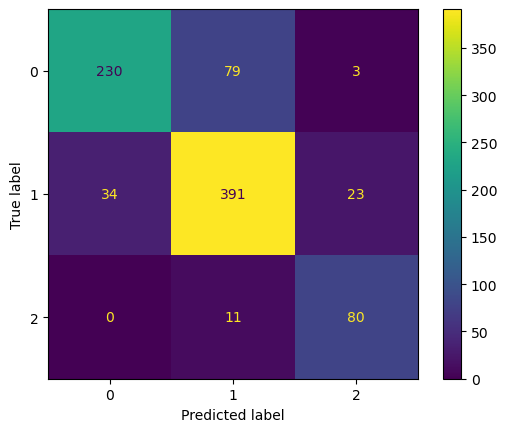

In [32]:
CM = confusion_matrix(y_test, y_pred, labels=LR_multi.classes_)
DCM = ConfusionMatrixDisplay(CM, display_labels=LR_multi.classes_)
DCM.plot()

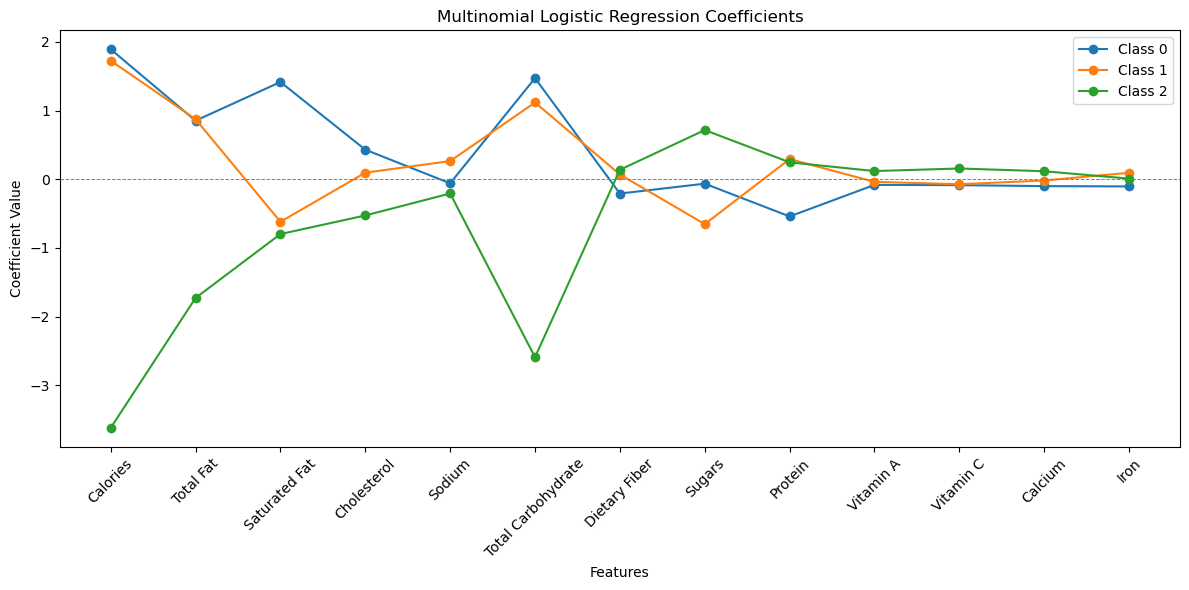

In [33]:
classes = LR_multi.classes_
feature_names = X_train.columns
coefs = LR_multi.coef_

plt.figure(figsize=(12, 6))
for i, class_label in enumerate(classes):
    plt.plot(coefs[i], label=f"Class {class_label}", marker='o')

plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Multinomial Logistic Regression Coefficients")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

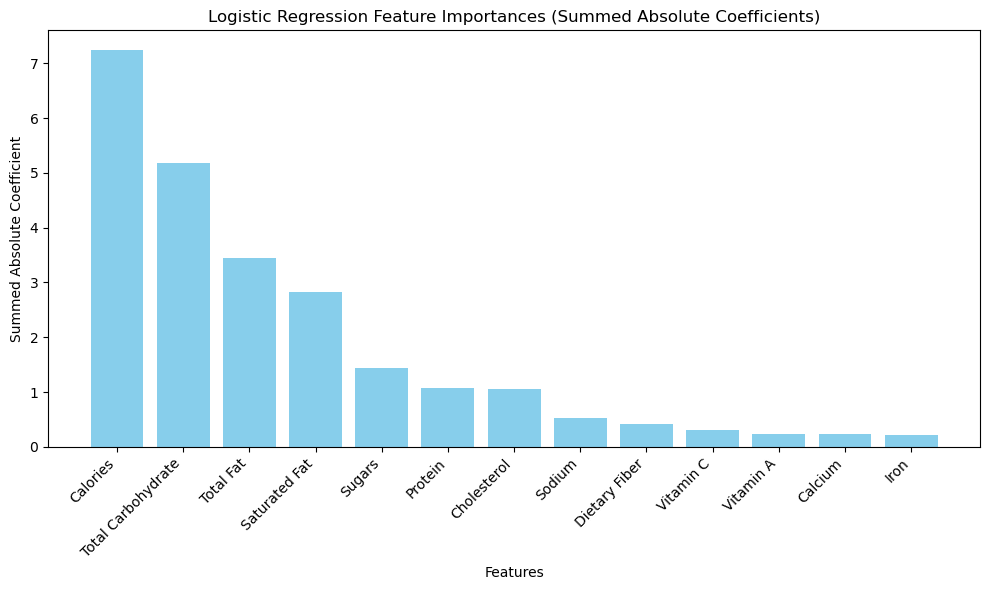

In [34]:
# Calculate total importance per feature across all classes
importances = np.sum(np.abs(LR_multi.coef_), axis=0)
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Logistic Regression Feature Importances (Summed Absolute Coefficients)")
plt.bar(range(len(importances)), importances[indices], align="center", color='skyblue')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Summed Absolute Coefficient")
plt.tight_layout()
plt.show()

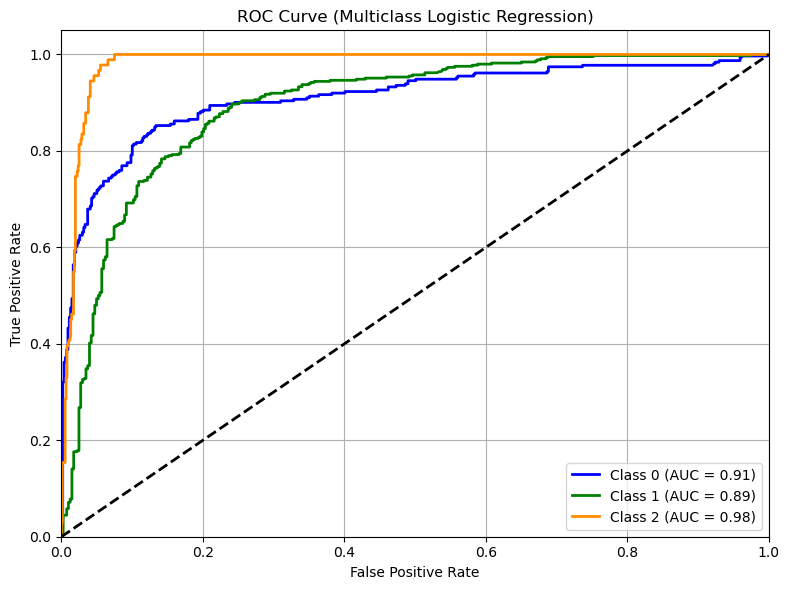

In [35]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = LR_multi.predict_proba(X_test_scale)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'darkorange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass Logistic Regression)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression(multi_class='multinomial', max_iter=1000)

param_grid = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

grid_search.fit(X_train_scale, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['saga']}],
             scoring='f1_weighted', verbose=1)

In [37]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [38]:
y_pred = best_model.predict(X_test_scale)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       312
           1       0.82      0.88      0.85       448
           2       0.77      0.89      0.83        91

    accuracy                           0.83       851
   macro avg       0.82      0.83      0.82       851
weighted avg       0.83      0.83      0.83       851



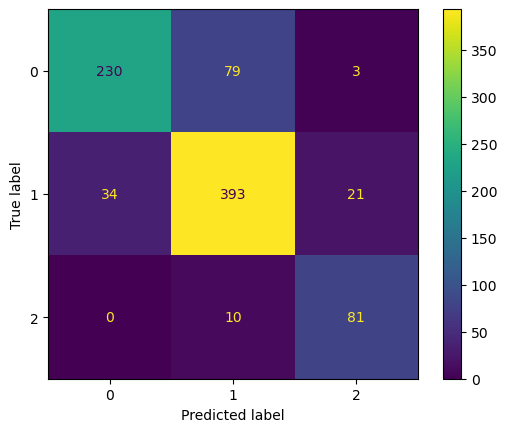

In [39]:
CM = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
DCM = ConfusionMatrixDisplay(CM, display_labels=best_model.classes_)
DCM.plot()

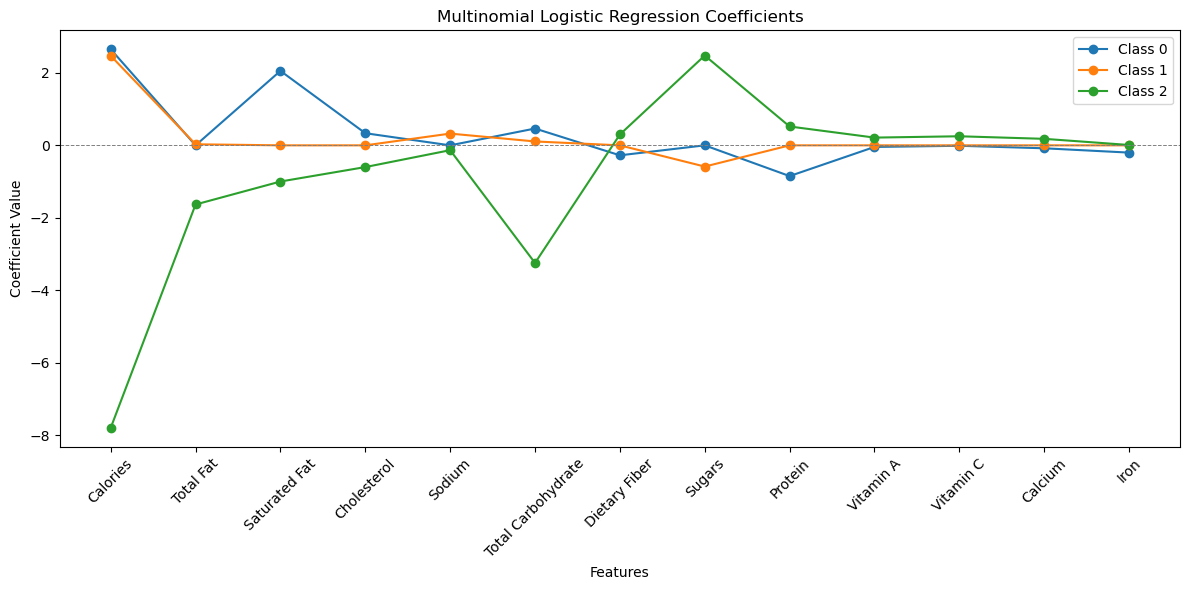

In [40]:
classes = best_model.classes_
feature_names = X_train.columns
coefs = best_model.coef_

plt.figure(figsize=(12, 6))
for i, class_label in enumerate(classes):
    plt.plot(coefs[i], label=f"Class {class_label}", marker='o')

plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Multinomial Logistic Regression Coefficients")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

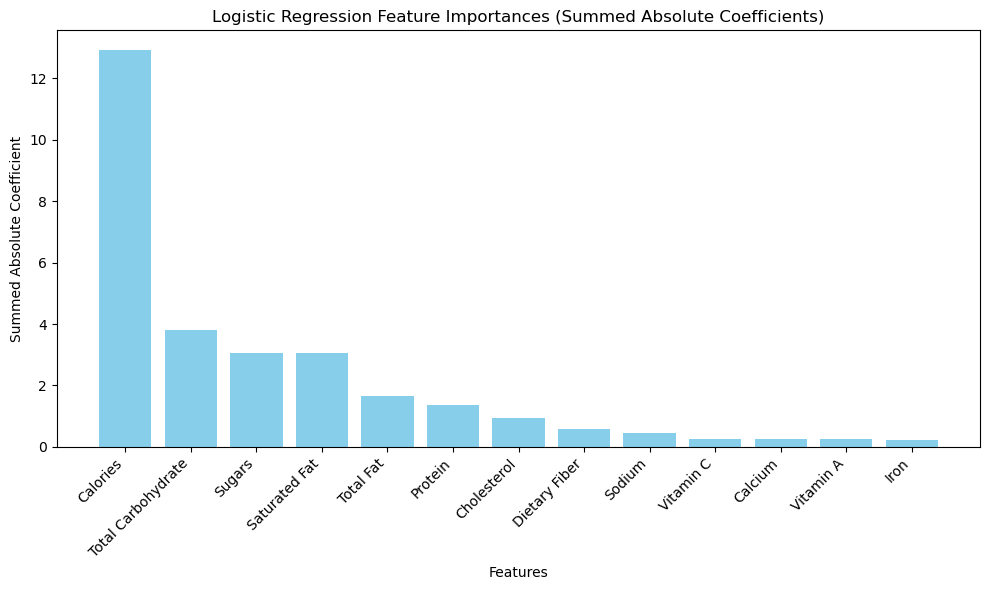

In [41]:
# Calculate total importance per feature across all classes
importances = np.sum(np.abs(best_model.coef_), axis=0)
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Logistic Regression Feature Importances (Summed Absolute Coefficients)")
plt.bar(range(len(importances)), importances[indices], align="center", color='skyblue')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Summed Absolute Coefficient")
plt.tight_layout()
plt.show()

#### Check Non-Zero Coefficients

In [42]:
non_zero = np.sum(best_model.coef_ != 0, axis=1)
for i, nz in enumerate(non_zero):
    print(f"Class {i}: {nz} non-zero coefficients")

Class 0: 10 non-zero coefficients
Class 1: 5 non-zero coefficients
Class 2: 13 non-zero coefficients


#### Results:
- The higher and more to the left the curve, the better.
- Class 2 is the most easily distinguishable by model.
- Class 1 is slightly harder to distinguish but still strong.

## Modeling (One-vs-Rest Logistic Regression)

In [43]:
LR_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', penalty='l2', C=1.0, max_iter=1000)
LR_ovr.fit(X_train_scale, y_train)
y_pred_ovr = LR_ovr.predict(X_test_scale)
y_prob_ovr = LR_ovr.predict_proba(X_test_scale)

print("\nOne-vs-Rest Logistic Regression:\n")
print(classification_report(y_test, y_pred_ovr))


One-vs-Rest Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       312
           1       0.80      0.85      0.83       448
           2       0.76      0.81      0.78        91

    accuracy                           0.81       851
   macro avg       0.80      0.80      0.80       851
weighted avg       0.81      0.81      0.81       851



c:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Multinomial Logistic Regression performs slightly **better**: